# Speed dating experiment

## What influences love at first sight? Or, at least, love in the first four minutes?

The [dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment) was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper *Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment*.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

## Setup

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [155]:
data = pd.read_csv('SpeedDatingData.csv')

### Style

In [156]:
blue = '#1e1eff'
purple = '#7c7bfb'
salmon = '#ff9696'
red = '#ff5a5a'
pie_chart_colors = [red, blue]

In [157]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [158]:
# Hiding warnings for better appereance (this was added after checking all warnings)
import warnings
warnings.filterwarnings(action = "ignore")

## Data preprocessing
The original structure of data is a bit complicated and joins are needed if full data about a single date needed. So we decided to preprocess it so, that no joins will be needed. We achieved format which is easier to work with.

### Selecting and renaming attributes
Every row consists of data about both people attending the speed date. Partner's data is suffixed with *'_partners'*.

Partner's preffered attributes are suffixed with *'_pref'* and the person's own attributes are suffixed with *'_me'*.

#### Personal data
Personal data about the date participant and preffered partner's attribute.

In [159]:
personal_data = data[[
    'iid',
    'gender',
    'age',
    'wave',
    'field',
    'field_cd',
    'race',
    'imprace',
    'imprelig',
    'from',
    'income',
    'goal',
    'date',
    'go_out',
    'career',
    'career_c',
    'sports',
    'tvsports',
    'exercise',
    'dining',
    'museums',
    'art',
    'hiking',
    'gaming',
    'clubbing',
    'reading',
    'tv',
    'theater',
    'movies',
    'concerts',
    'music',
    'shopping',
    'yoga',
    'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',
    'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1',
    'you_call','them_cal',
    'date_3'
]]

personal_data.drop_duplicates(inplace=True)
personal_data = personal_data.rename(columns=
    {'attr1_1':'attr_pref',
     'sinc1_1':'sinc_pref',
     'intel1_1':'intel_pref',
     'fun1_1':'fun_pref',
     'amb1_1':'amb_pref',
     'shar1_1':'shar_pref',
     'attr3_1':'attr_me',
     'sinc3_1':'sinc_me',
     'intel3_1':'intel_me',
     'fun3_1':'fun_me',
     'amb3_1':'amb_me' 
    }
)

#### Dating data
Information about the date.

In [160]:
dating_data = data[[
    'iid','id','pid',
    'samerace',
    'match',
    'int_corr',
    'dec_o',
    'dec',
    'like'    
]]

dating_data.drop_duplicates(inplace=True)
dating_data = dating_data.rename(columns=
    {
        'dec_o':'dec_partner',
        'like':'iid_like_pid'
    }
)

In [161]:
df = dating_data.merge(personal_data, how='left', on='iid')
df = df.merge(personal_data, how='left', left_on='pid', right_on='iid', suffixes=['','_partners']) 

In [162]:
df.to_csv("dataset.csv")

In [163]:
df[df['match']==1]['goal'].value_counts()

1.0    583
2.0    484
3.0    100
5.0     85
6.0     62
4.0     51
Name: goal, dtype: int64

In [164]:
df.pivot_table(values='match',index=['goal','goal_partners'],aggfunc=np.sum)

match
goal goal_partners       
1.0  1.0              254
     2.0              203
     3.0               46
     4.0               21
     5.0               32
     6.0               24
2.0  1.0              203
     2.0              156
     3.0               34
     4.0               21
     5.0               36
     6.0               27
3.0  1.0               46
     2.0               34
     3.0                2
     4.0                3
     5.0                9
     6.0                4
4.0  1.0               21
     2.0               21
     3.0                3
     4.0                2
     5.0                2
     6.0                2
5.0  1.0               32
     2.0               36
     3.0                9
     4.0                2
     5.0                2
     6.0                2
6.0  1.0               24
     2.0               27
     3.0                4
     4.0                2
     5.0                2
     6.0                2

## EDA

In [165]:
print(f'Number of records in dataset: {len(df)}')

Number of records in dataset: 8378


In [166]:
participants_count = df['iid'].nunique()
print(f'Number of participants in speed dating experiment: { participants_count }')

Number of participants in speed dating experiment: 551


In [167]:
matches_count = df['match'].sum()
print(f'Number of matches in speed dating experiment: { matches_count }, which is { round(matches_count / len(df)*100, 2) }%')

Number of matches in speed dating experiment: 1380, which is 16.47%


### Participants' gender ratio

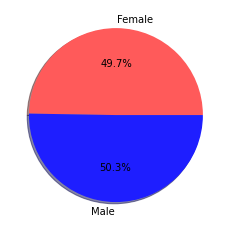

In [168]:
unique_participants_df = df.drop_duplicates(subset=['iid'])

gender = [len(unique_participants_df[unique_participants_df['gender'] == 0]), len(unique_participants_df[unique_participants_df['gender'] == 1])]
plt.pie(gender, labels = ['Female', 'Male'], shadow = True, autopct='%1.1f%%', colors = pie_chart_colors)
plt.show() 

### Matches ratio

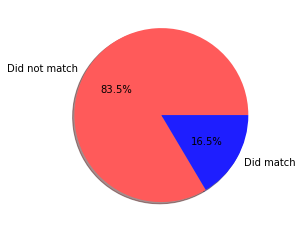

In [169]:
matches = [len(df[df['match'] == 0]), len(df[df['match'] == 1])]
plt.pie(matches, labels = ['Did not match', 'Did match'], shadow = True, autopct='%1.1f%%', colors = pie_chart_colors)
plt.show() 

### Participants' age

In [170]:
min(df['age'])

18.0

In [171]:
max(df['age'])

55.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8A1611F10>]],
      dtype=object)

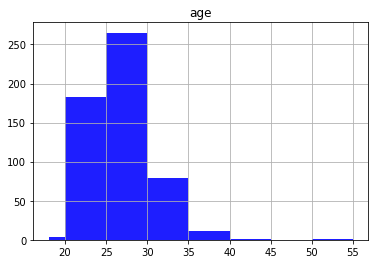

In [172]:
age_df = df[['iid', 'age']].drop_duplicates()

age_df.drop(columns = ['iid']).hist(bins=[18, 20, 25, 30, 35, 40, 45, 50, 55], figsize = (6, 4), color = blue)

#### Difference in matched participants' age

In [173]:
matched_df = df[df['match'] == 1]

matched_df['age_diff'] = abs(matched_df['age'] - matched_df['age_partners'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8A1A7CC70>]],
      dtype=object)

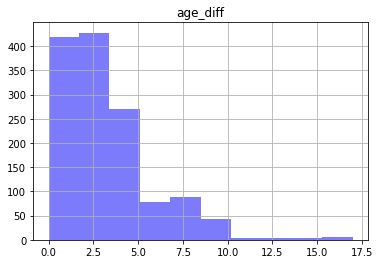

In [174]:
matched_df[[
    'age_diff'
]].hist(figsize = (6, 4), color = purple)

### Matched participants' race

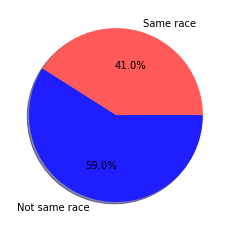

In [175]:
same_race_match_count = len(matched_df[matched_df['samerace'] == 1])
not_same_race_match_count = len(matched_df[matched_df['samerace'] == 0])

race_match = [same_race_match_count, not_same_race_match_count]
plt.pie(race_match, labels = ['Same race', 'Not same race'], shadow = True, autopct='%1.1f%%', colors = pie_chart_colors)
plt.show() 

### Participants' career

In [176]:
# credits for plot: https://stackoverflow.com/questions/49199164/increasing-pie-chart-size-with-matplotlib-radius-parameter-appears-to-do-nothin

def advanced_pie_chart(data, labels, fig_size):
    fig1, ax1 = plt.subplots(figsize = fig_size)
    fig1.subplots_adjust(0.3, 0, 1, 1)

    theme = plt.get_cmap('bwr')
    ax1.set_prop_cycle("color", [theme(1. * i / len(data)) for i in range(len(data))])

    _, _ = ax1.pie(data, startangle=90)

    ax1.axis('equal')

    total = sum(data)
    plt.legend(
        loc='upper left',
        labels=['%s, %1.1f%%' % (
            l, (float(s) / total) * 100) for l, s in zip(labels, data)],
        prop={'size': 17},
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure
    )

    plt.show()

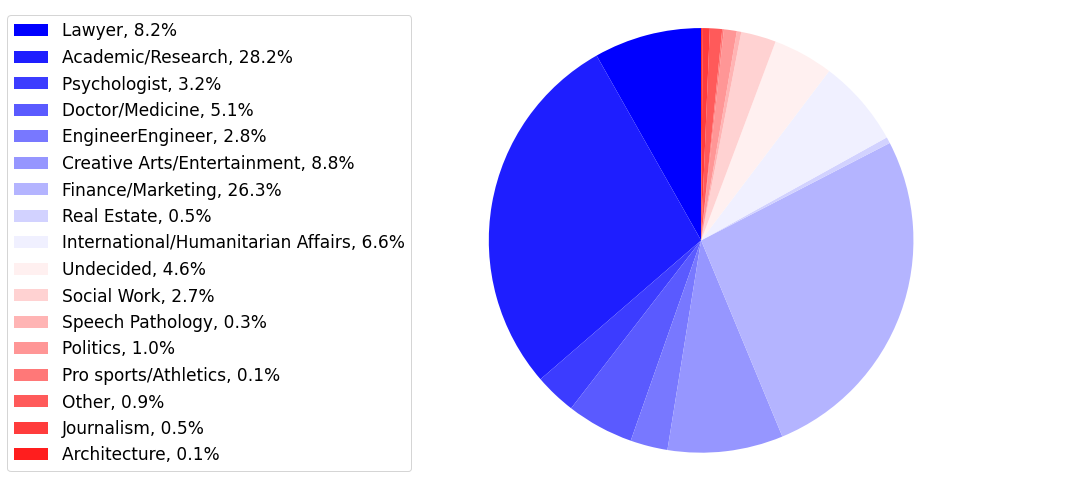

In [177]:
carrer_frequency = []

for i in range(1, 18):
    carrer_frequency.append(len(df[df['career_c'] == i]))
    
labels = ['Lawyer', 'Academic/Research', 'Psychologist', 'Doctor/Medicine', 'EngineerEngineer', 'Creative Arts/Entertainment',
          'Finance/Marketing', 'Real Estate', 'International/Humanitarian Affairs', 'Undecided', 'Social Work', 'Speech Pathology',
          'Politics', 'Pro sports/Athletics', 'Other', 'Journalism', 'Architecture']

advanced_pie_chart(carrer_frequency, labels, (15, 6.5))

### How often participatns go out, date

#### How often participatns go out

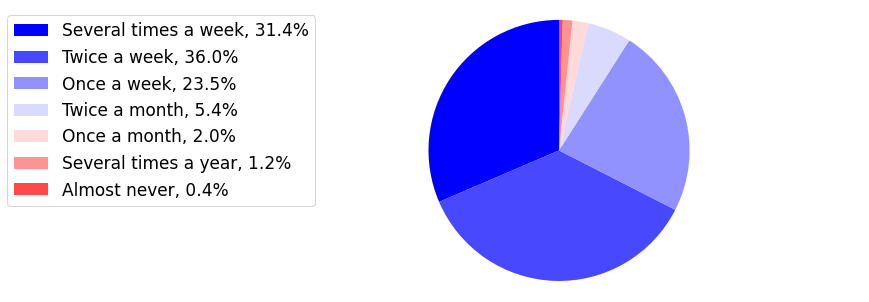

In [178]:
labels = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year',
          'Almost never']
go_out_frequency = []

for i in range(1, 8):
    go_out_frequency.append(len(df[df['go_out'] == i]))
    
advanced_pie_chart(go_out_frequency, labels, (12, 4))

#### How often participatns date

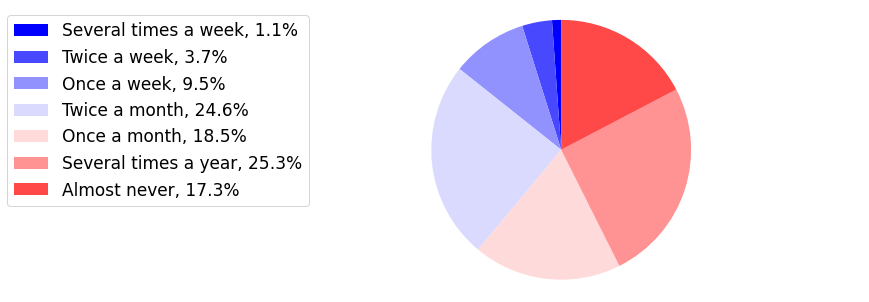

In [179]:
date_frequency = []

for i in range(1, 8):
    date_frequency.append(len(df[df['date'] == i]))

advanced_pie_chart(date_frequency, labels, (12, 4))

In [180]:
matched_df['date_diff'] = abs(matched_df['date'] - matched_df['date_partners'])
matched_df['go_out_diff'] = abs(matched_df['go_out'] - matched_df['go_out_partners'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8A1DCEFA0>,
      dtype=object)

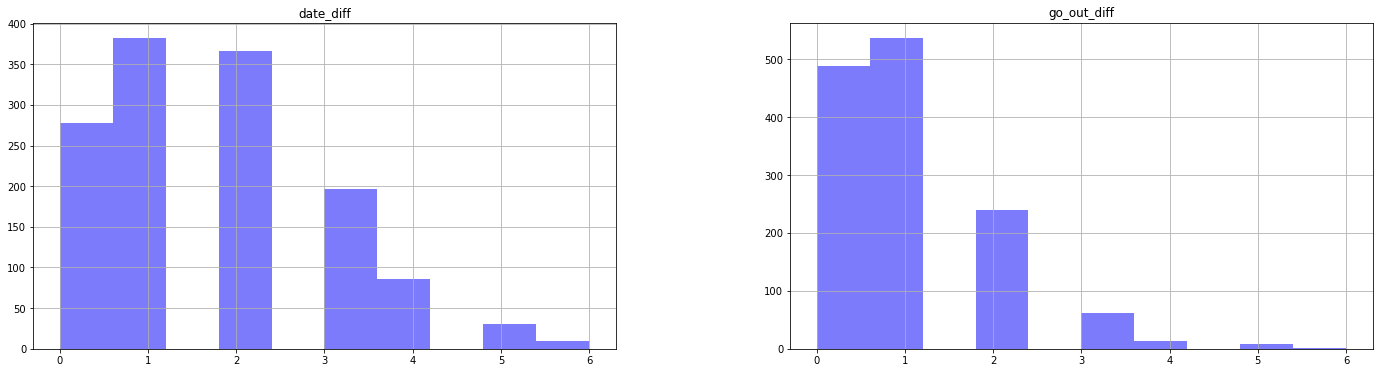

In [181]:
matched_df[[
    'date_diff', 'go_out_diff'
]].hist(figsize=(24, 6), color = purple)

### How many times partners has participant contacted to set up a date since the speed dating 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8A1977580>]],
      dtype=object)

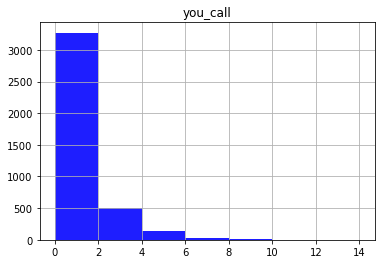

In [182]:
df[[
    'you_call'
]].hist(figsize = (6, 4), bins=[0, 2, 4, 6, 8, 10, 12, 14], color = blue)

### How many partners have contacted the participant

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8A1680640>]],
      dtype=object)

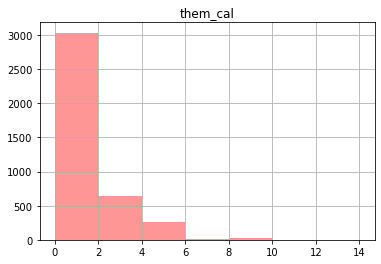

In [183]:
df[[
    'them_cal'
]].hist(figsize = (6, 4), bins=[0, 2, 4, 6, 8, 10, 12, 14], color = salmon)

### Do participants which go out more contact partners to set up a date more?

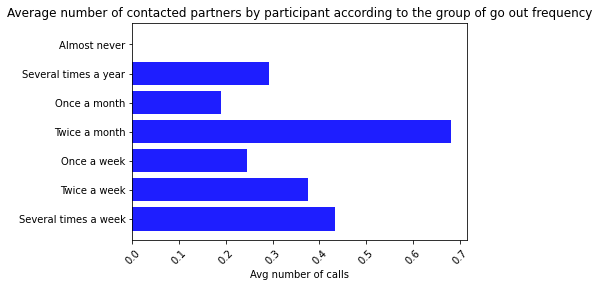

In [184]:
labels = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year',
          'Almost never']
avg_calls = []

for i in range(1, 8):
    tmp_df = df[df['go_out'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
plt.barh(labels, avg_calls, color = blue)
plt.title('Average number of contacted partners by participant according to the group of go out frequency')
plt.xlabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### Do participants which date more contact partners to set up a date more?

In [185]:
labels = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year',
          'Almost never']
avg_calls = []

for i in range(1, 8):
    tmp_df = df[df['date'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
plt.barh(labels, avg_calls, color = blue)
plt.title('Average number of contacted partners by participant according to the group of date frequency')
plt.xlabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### Do participants of some career group call more to set up a date?

In [186]:
labels = ['Lawyer', 'Academic/Research', 'Psychologist', 'Doctor/Medicine', 'EngineerEngineer', 'Creative Arts/Entertainment',
          'Finance/Marketing', 'Real Estate', 'International/Humanitarian Affairs', 'Undecided', 'Social Work', 'Speech Pathology',
          'Politics', 'Pro sports/Athletics', 'Other', 'Journalism', 'Architecture']
avg_calls = []

for i in range(1, 18):
    tmp_df = df[df['career_c'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
plt.barh(labels, avg_calls, color = blue)
plt.title('Average number of contacted partners by participant according to their career')
plt.xlabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### Have more attractive participant received more calls?

In [187]:
labels = list(range(1, 11, 1))
avg_calls = []

for i in range(1, 11):
    tmp_df = df[df['attr_me'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
plt.plot(labels, avg_calls, color = blue)
plt.title('Average number of received calls according to level of attractiveness')
plt.xlabel('Level of attractiveness')
plt.ylabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

In [188]:
labels = list(range(1, 11, 1))
labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### How participants measure up themselves and what are their preferences
Participant measured up themselves and preferrences on their partner. They rated importance of following 6 attributes:
 - attr - attractive
 - sinc - sincere
 - fun - funny
 - intel - intelligent
 - amb - ambitious
 - shar - having shared interests/hobbies

#### Participant measured up themself
On a scale of 1-10 (1= awful and 10=great).  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8A1C55D30>,
      dtype=object)

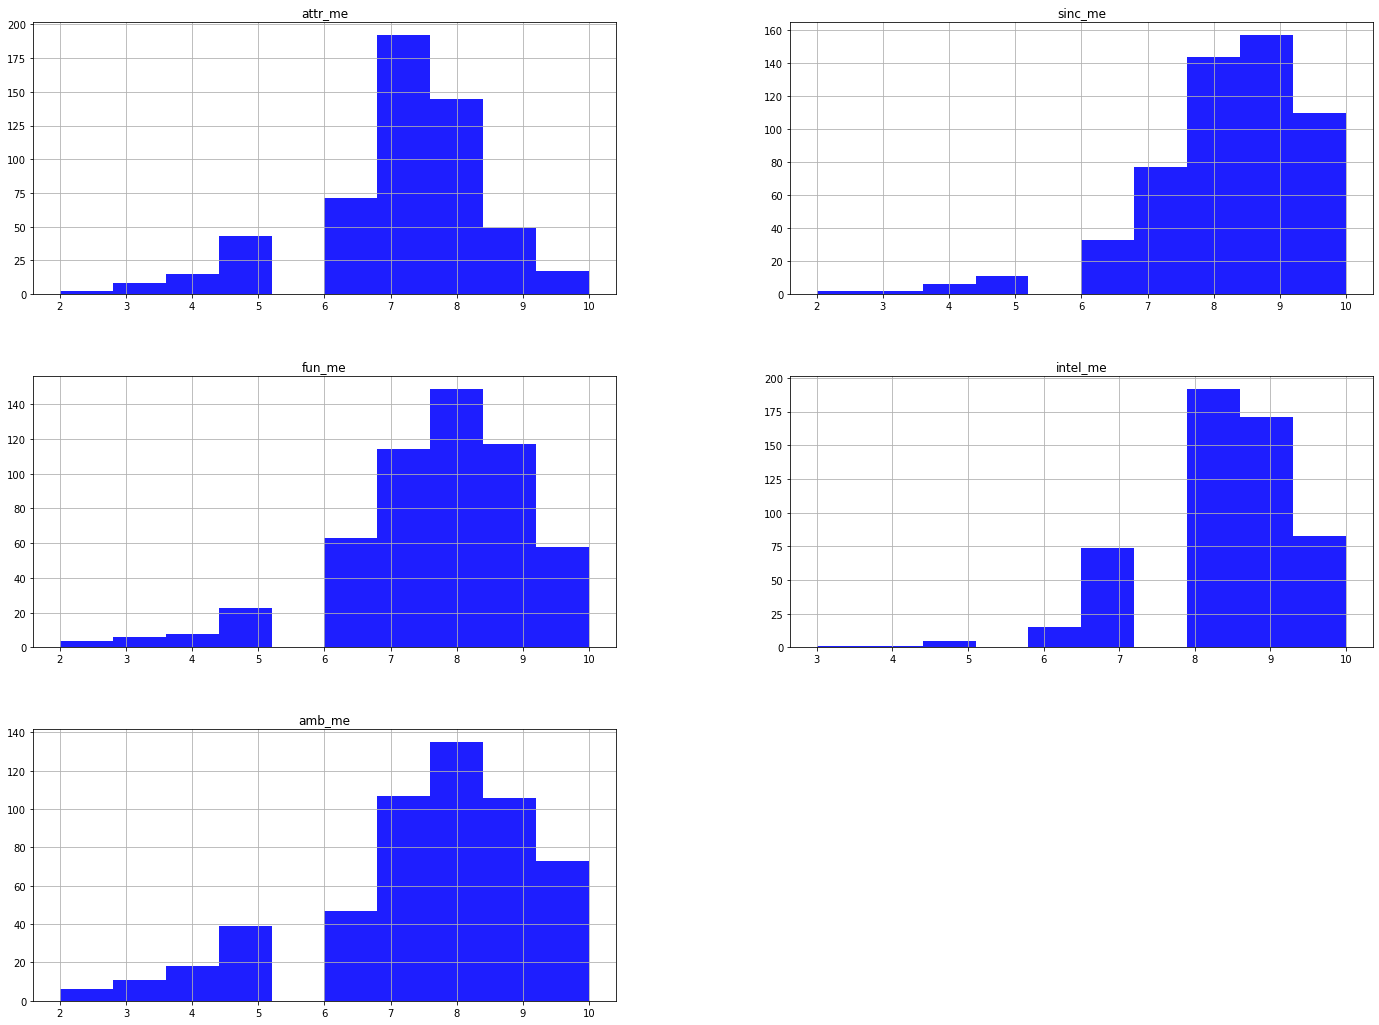

In [189]:
attributes_me_df = df[['iid',
    'attr_me','sinc_me','fun_me','intel_me','amb_me'
]].drop_duplicates()

attributes_me_df.drop(columns = ['iid']).hist(figsize = (24, 18), color = blue)

#### Participant rated how are basic partner's attributes important to them
On a scale of 1-10 (1=not at all important, 10=extremely important)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8B3A85D90>,
      dtype=object)

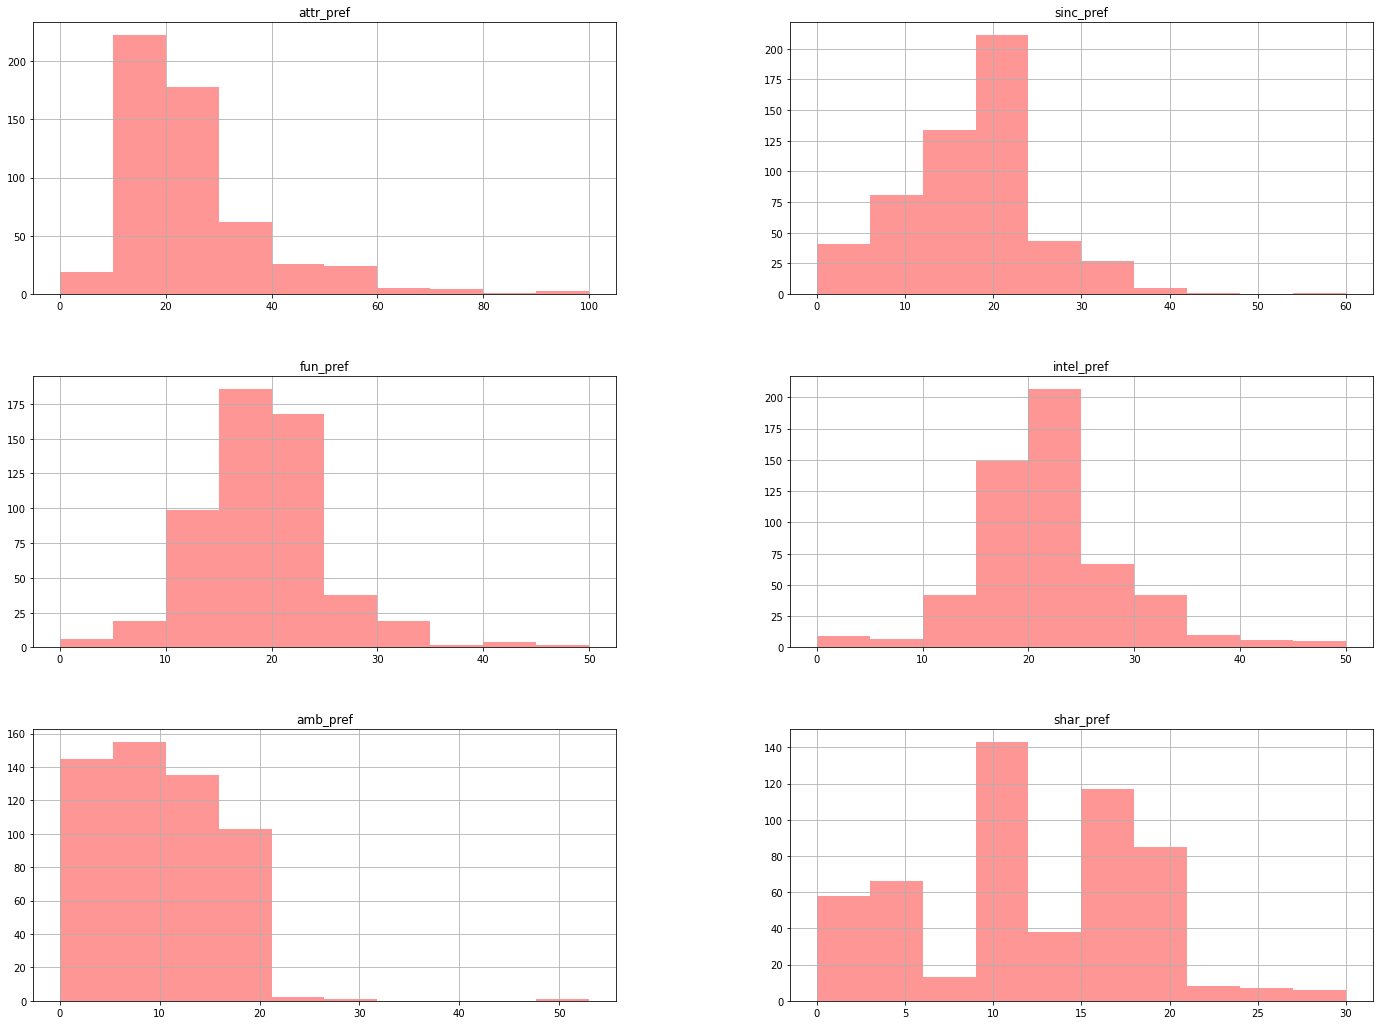

In [190]:
attributes_pref_df = df[[ 'iid',
    'attr_pref','sinc_pref','fun_pref','intel_pref','amb_pref','shar_pref'
]].drop_duplicates()

attributes_pref_df.drop(columns = ['iid']).hist(figsize = (24, 18), color = salmon)

## Comparision features

### How big is the difference between participant's attributes and their preferences to partner?
On a scale of 0-9 (0=no difference, 9=extreme difference)

In [191]:
df['attr_me_my_partner_diff'] = df['attr_me'] - df['attr_me_partners']
df['sinc_me_my_partner_diff'] = df['sinc_me'] - df['sinc_me_partners']
df['fun_me_my_partner_diff'] = df['fun_me'] - df['fun_me_partners']
df['intel_me_my_partner_diff'] = df['intel_me'] - df['intel_me_partners']
df['amb_me_my_partner_diff'] = df['amb_me'] - df['amb_me_partners']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8B37E2E50>,
      dtype=object)

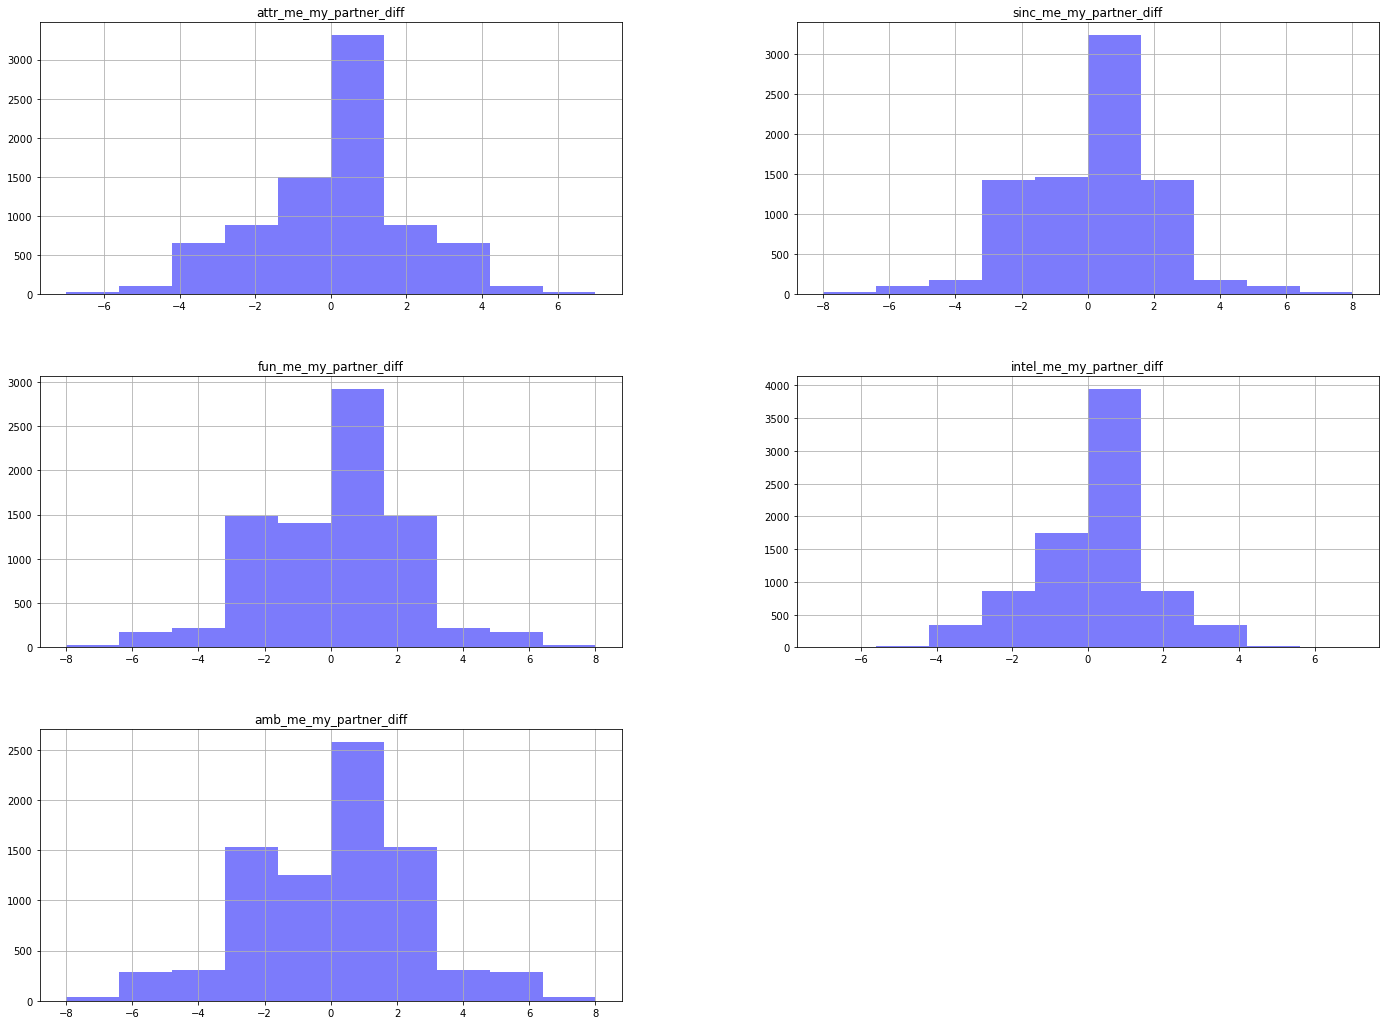

In [192]:
comparision_df = df[['iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].drop_duplicates()

comparision_df[[
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].hist(figsize=(24,18), color = purple)

### How big is the difference between participant's attributes and their matched partner attributes? (Both measured up themselves)
On a scale of 0-9 (0=no difference, 9=extreme difference)

attr_me_my_partner_diff


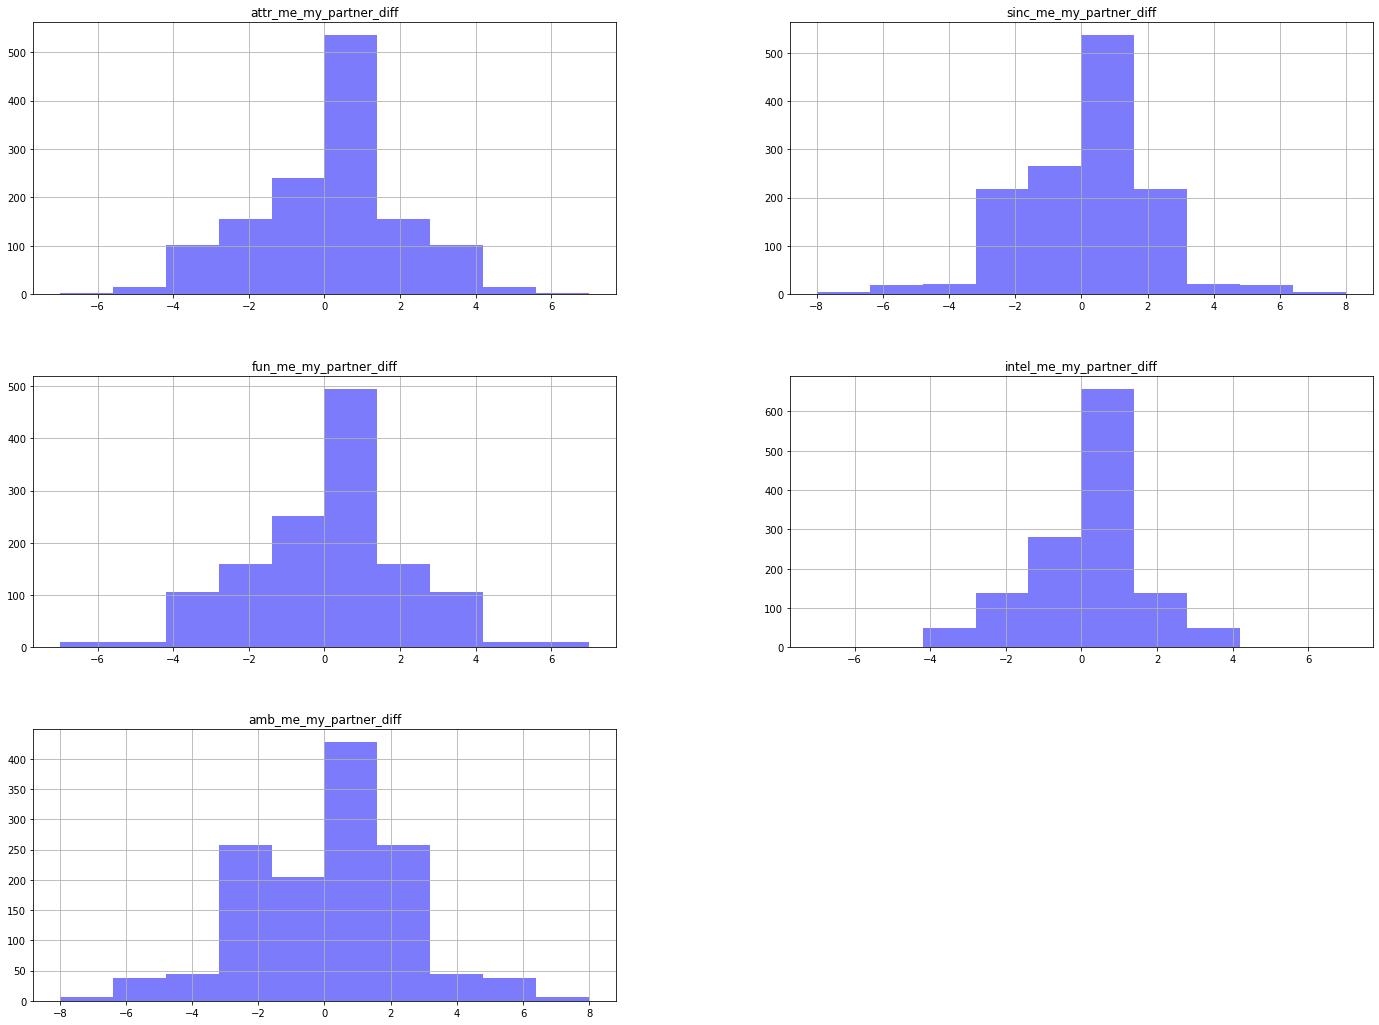

sinc_me_my_partner_diff


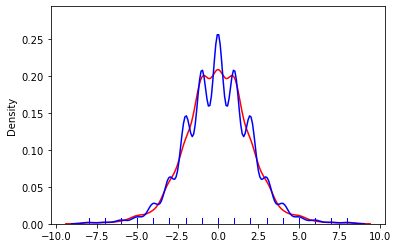

fun_me_my_partner_diff


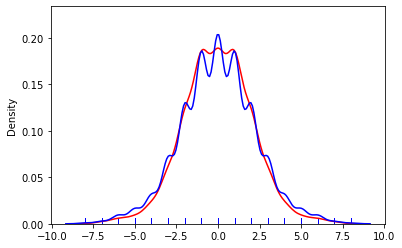

intel_me_my_partner_diff


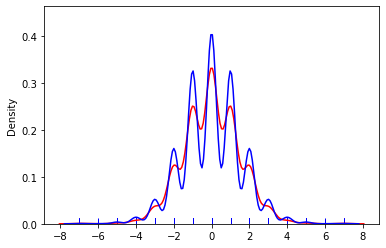

amb_me_my_partner_diff


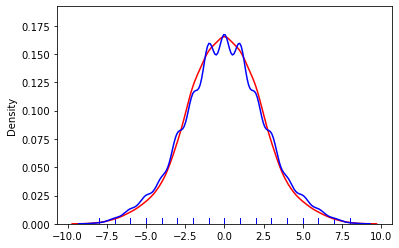

In [195]:
df_temp_match = df[df['match']==1]

df_temp_not_match = df[df['match']==0]

comparision_df_match = df_temp_match[['iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].drop_duplicates()

comparision_df_not_match = df_temp_not_match[['iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].drop_duplicates()

comparision_df_match[[
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].hist(figsize=(24,18), color = purple)

def print_graph(comparision_df_match,comparision_df_not_match,col_name):
    print(col_name)
    sns.distplot(comparision_df_match[[col_name]], hist=False, rug=True,color='red'
    )

    sns.distplot(comparision_df_not_match[[col_name]], hist=False, rug=True,color='blue'
                )
    plt.show()
    
for i in ['attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff']:
    print_graph(comparision_df_match,comparision_df_not_match,i)

### How big is the difference between participant's preferences and their matched partner's preferences?
On a scale of 0-9 (0=no difference, 9=extreme difference)

In [81]:
df['attr_me_pref_my_partner_pref_diff'] = df['attr_pref'] - df['attr_pref_partners']
df['sinc_me_pref_my_partner_pref_diff'] = df['sinc_pref'] - df['sinc_pref_partners']
df['fun_me_pref_my_partner_pref_diff'] = df['fun_pref'] - df['fun_pref_partners']
df['intel_me_pref_my_partner_pref_diff'] = df['intel_pref'] - df['intel_pref_partners']
df['amb_me_pref_my_partner_pref_diff'] = df['amb_pref'] - df['amb_pref_partners']

## Hobbies

### How important are hobbies to participants?
On a scale of 1-10 (1=not at all important, 10=extremely important)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8A137AC70>,
      dtype=object)

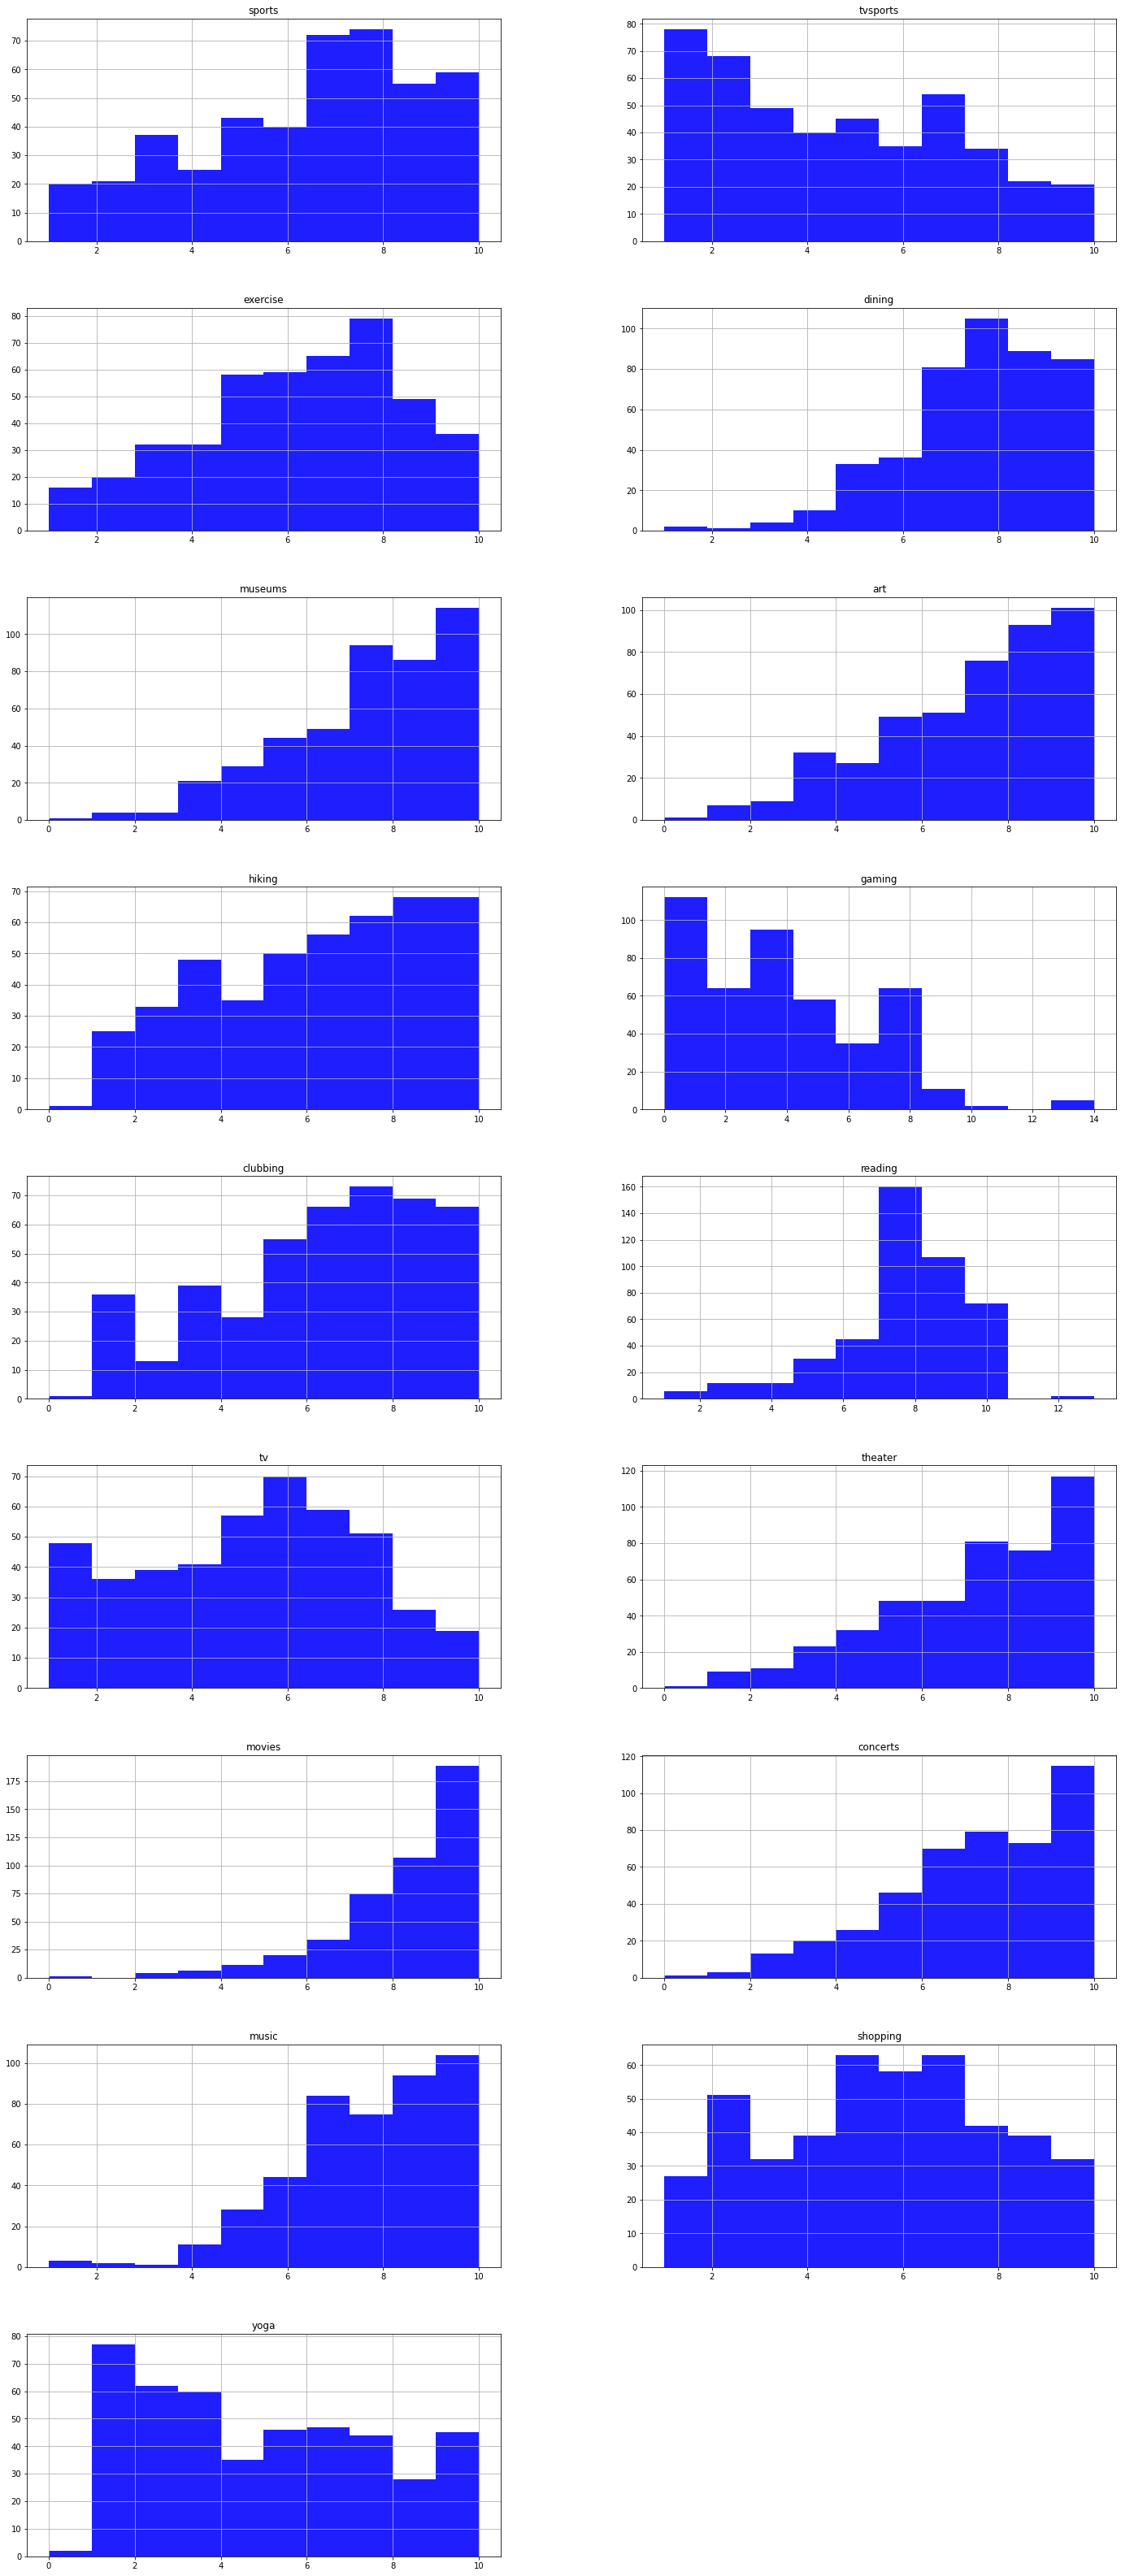

In [83]:
comparision_df = df_temp[['iid',
    'sports','tvsports','exercise','dining','museums','art','hiking','gaming',
    'clubbing','reading','tv','theater', 'movies','concerts','music','shopping','yoga',
]].drop_duplicates()

comparision_df[[
    'sports','tvsports','exercise','dining','museums','art','hiking','gaming',
    'clubbing','reading','tv','theater', 'movies','concerts','music','shopping','yoga',
]].hist(figsize=(24,64), layout=(10,2), color = blue)

### How big is the difference between participant's importance of hobbies and their matched partner importance of hobbies?
On a scale of 0-9 (0=no difference, 9=extreme difference)

In [198]:
df['sports_me_my_partner_diff'] = df['sports'] - df['sports_partners']
df['tvsports_me_my_partner_diff'] = abs(df['tvsports'] - df['tvsports_partners'])
df['exercise_me_my_partner_diff'] = abs(df['exercise'] - df['exercise_partners'])
df['dining_me_my_partner_diff'] = abs(df['dining'] - df['dining_partners'])
df['museums_me_my_partner_diff'] = abs(df['museums'] - df['museums_partners'])
df['art_me_my_partner_diff'] = abs(df['art'] - df['art_partners'])
df['hiking_me_my_partner_diff'] = abs(df['hiking'] - df['hiking_partners'])
df['gaming_me_my_partner_diff'] = abs(df['gaming'] - df['gaming_partners'])
df['clubbing_me_my_partner_diff'] = abs(df['clubbing'] - df['clubbing_partners'])
df['reading_me_my_partner_diff'] = abs(df['reading'] - df['reading_partners'])
df['tv_me_my_partner_diff'] = abs(df['tv'] - df['tv_partners'])
df['theater_me_my_partner_diff'] = abs(df['theater'] - df['theater_partners'])
df['movies_me_my_partner_diff'] = abs(df['movies'] - df['movies_partners'])
df['concerts_me_my_partner_diff'] = abs(df['concerts'] - df['concerts_partners'])
df['music_me_my_partner_diff'] = abs(df['music'] - df['music_partners'])
df['shopping_me_my_partner_diff'] = abs(df['shopping'] - df['shopping_partners'])
df['yoga_me_my_partner_diff'] = abs(df['yoga'] - df['yoga_partners'])

sports_me_my_partner_diff


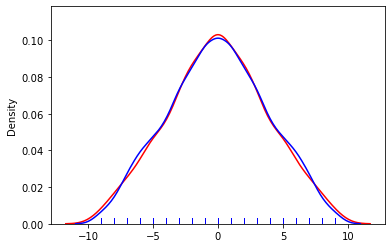

tvsports_me_my_partner_diff


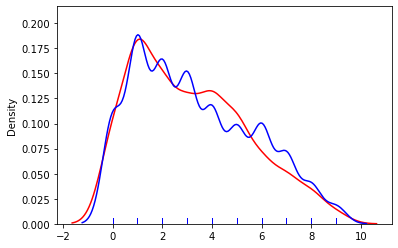

exercise_me_my_partner_diff


dining_me_my_partner_diff


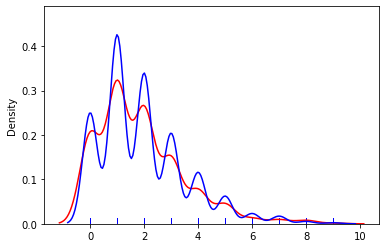

museums_me_my_partner_diff


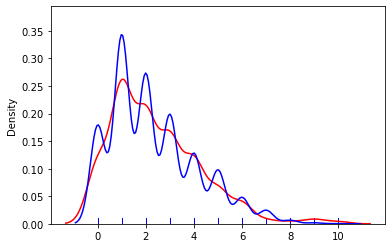

art_me_my_partner_diff


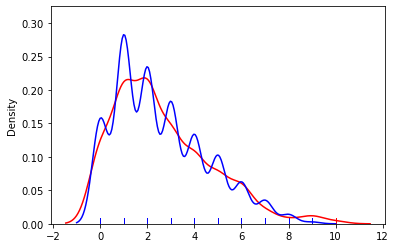

hiking_me_my_partner_diff


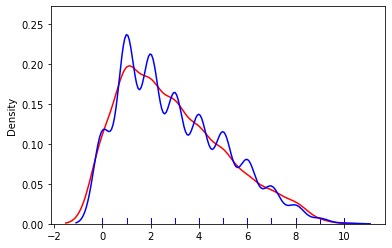

gaming_me_my_partner_diff


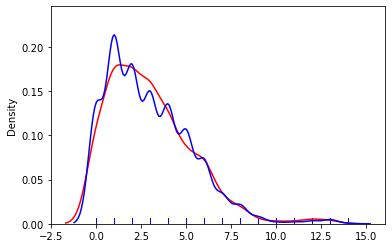

clubbing_me_my_partner_diff


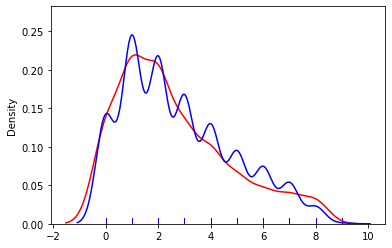

reading_me_my_partner_diff


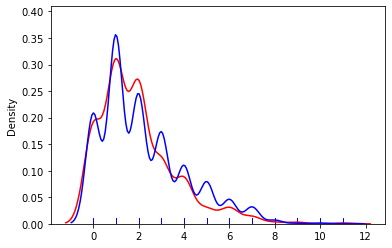

tv_me_my_partner_diff


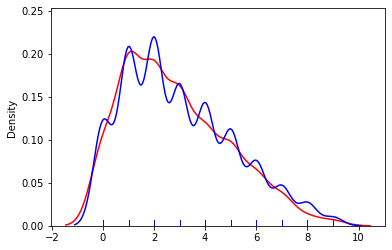

theater_me_my_partner_diff


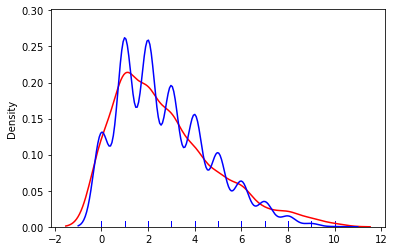

movies_me_my_partner_diff


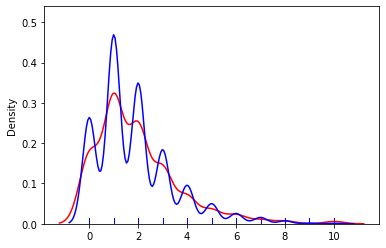

concerts_me_my_partner_diff


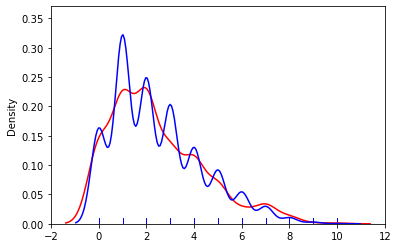

music_me_my_partner_diff


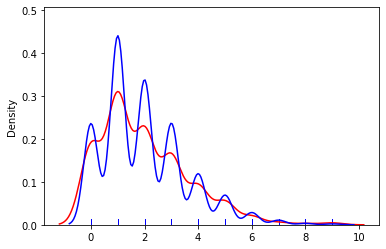

shopping_me_my_partner_diff


yoga_me_my_partner_diff


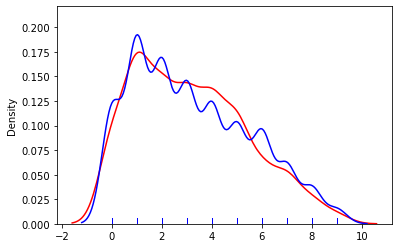

In [199]:
mat = df[df['match']==1]
not_ma = df[df['match']==0]

for i in ['sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff'
         ]:
    print_graph(mat,not_ma,i)
    
    
    

In [110]:
df_temp = df[df['match']==1]

comparision_df = df_temp[['iid','pid',
    'attr_me_pref_my_partner_pref_diff','sinc_me_pref_my_partner_pref_diff','fun_me_pref_my_partner_pref_diff',
    'intel_me_pref_my_partner_pref_diff','amb_me_pref_my_partner_pref_diff'
]].drop_duplicates()

comparision_df[[
    'attr_me_pref_my_partner_pref_diff','sinc_me_pref_my_partner_pref_diff','fun_me_pref_my_partner_pref_diff',
    'intel_me_pref_my_partner_pref_diff','amb_me_pref_my_partner_pref_diff'
]].hist(figsize=(24,18), color = purple)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8B08918B0>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8A67E07C0>,
      dtype=object)

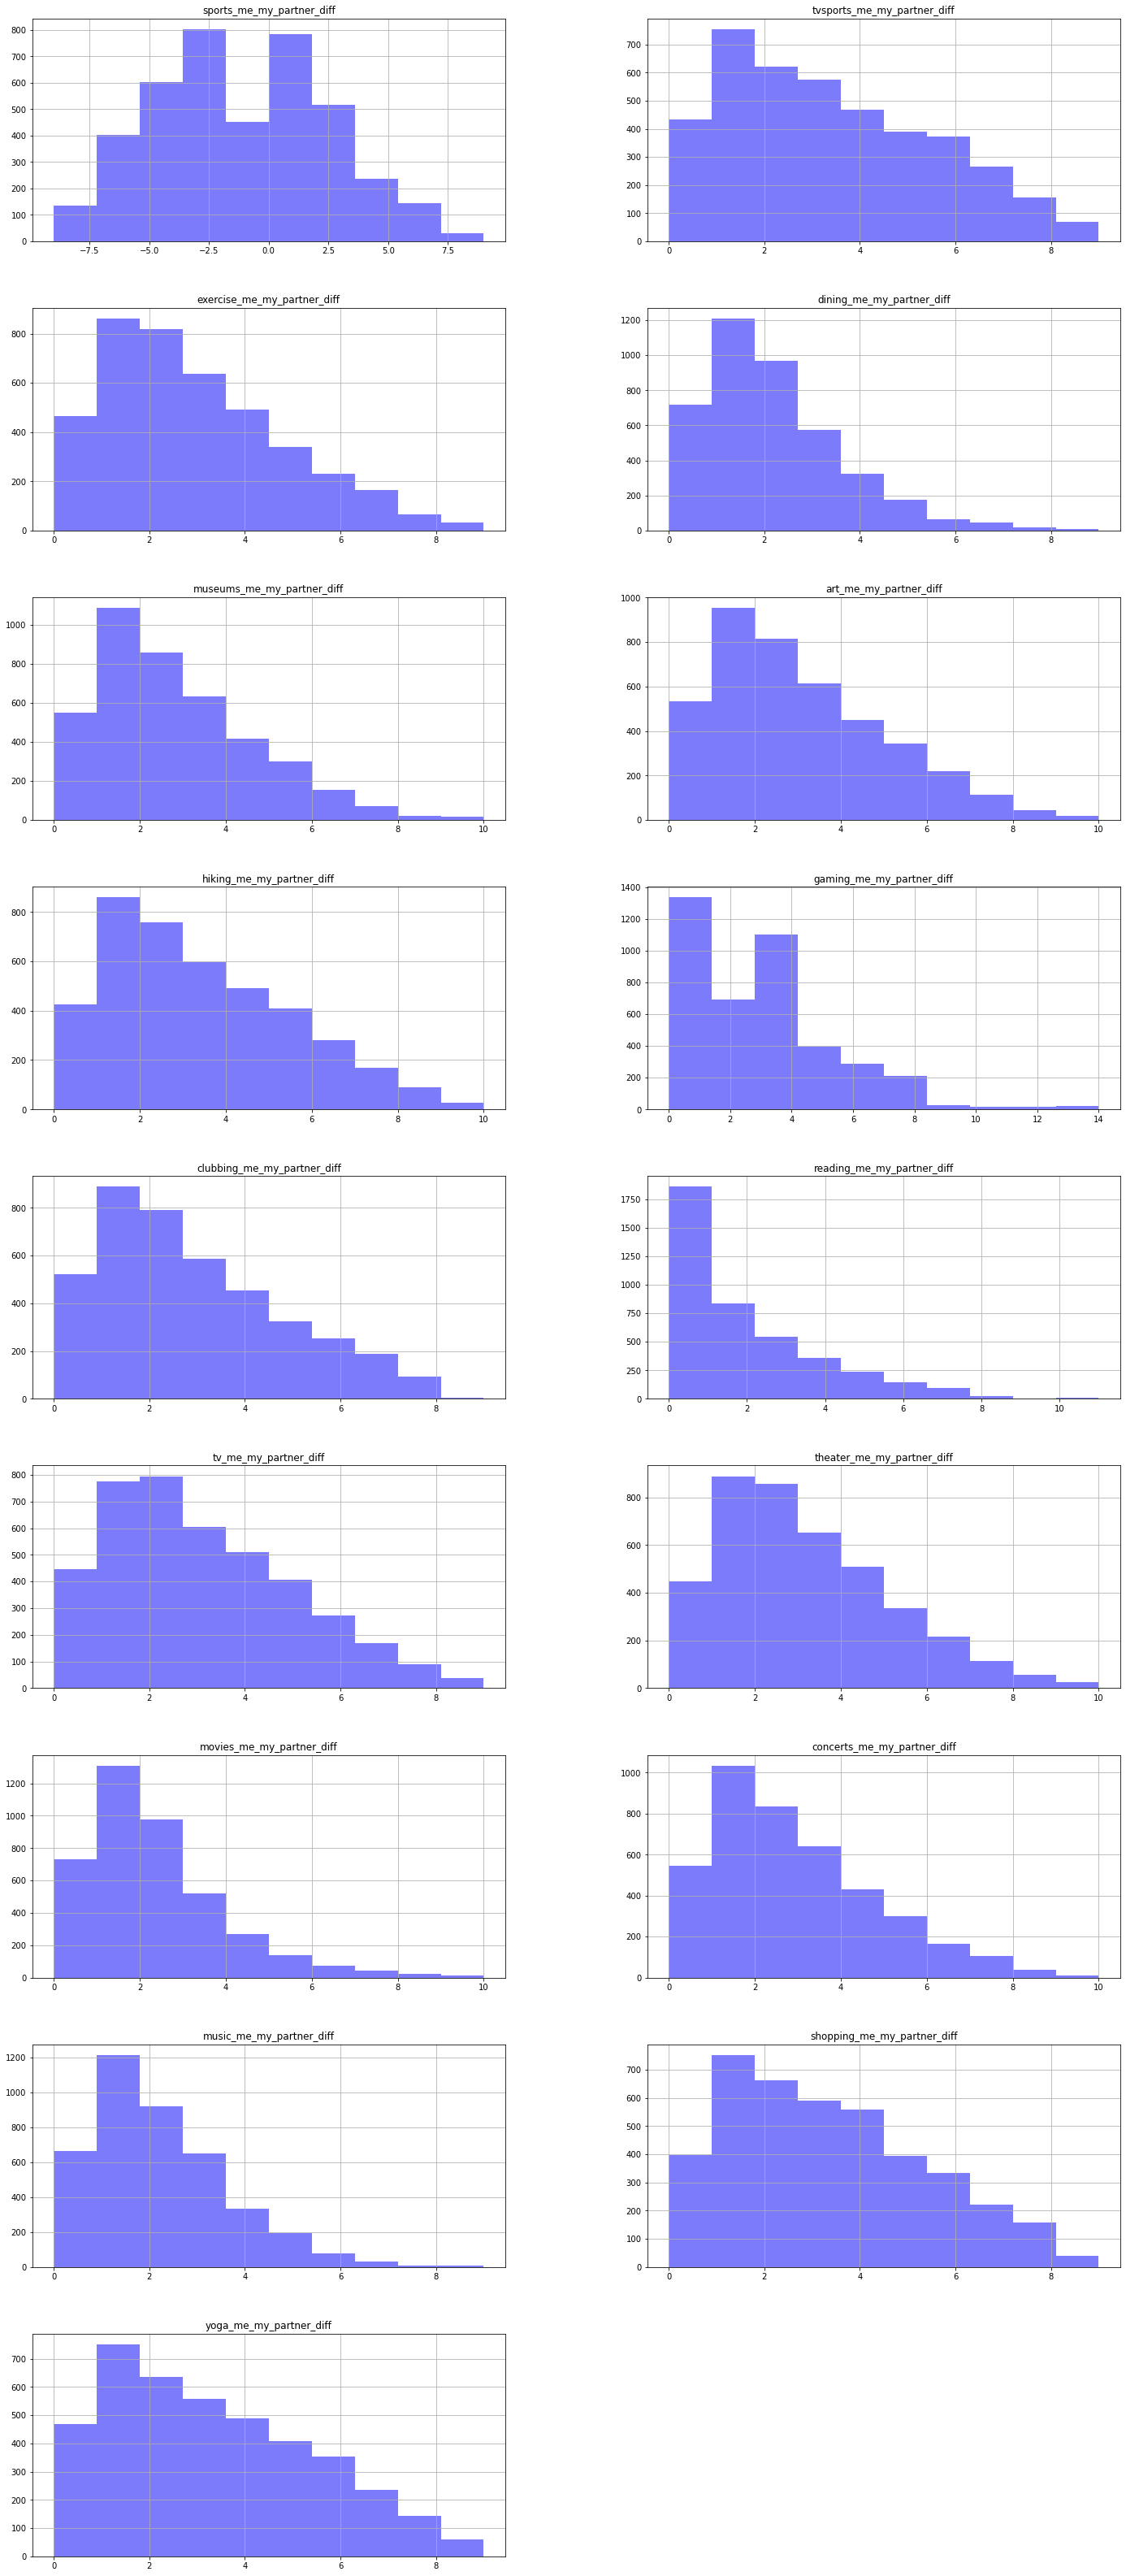

In [91]:
df_temp = df[df['match']==1]
df_temp = df[df['gender']==0]

comparision_df = df_temp[['iid','pid',
    'sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
]].drop_duplicates()

comparision_df[[
    'sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
]].hist(figsize=(24,64), layout=(10,2), color = purple)

## Correlations

In [113]:
df

iid    id    pid  samerace  match  int_corr  dec_partner  dec  \
0       1   1.0   11.0         0      0      0.14            0    1   
1       1   1.0   12.0         0      0      0.54            0    1   
2       1   1.0   13.0         1      1      0.16            1    1   
3       1   1.0   14.0         0      1      0.61            1    1   
4       1   1.0   15.0         0      1      0.21            1    1   
...   ...   ...    ...       ...    ...       ...          ...  ...   
8373  552  22.0  526.0         0      0      0.64            1    0   
8374  552  22.0  527.0         0      0      0.71            0    0   
8375  552  22.0  528.0         0      0     -0.46            0    0   
8376  552  22.0  529.0         0      0      0.62            1    0   
8377  552   NaN  530.0         0      0      0.01            1    0   

      iid_like_pid  gender  ...  gaming_me_my_partner_diff  \
0              7.0       0  ...                        4.0   
1              7.0       0  ...                        2.0   
2              7.0       0  ...                        6.0   
3              7.0       0  ...                        7.0   
4              6.0       0  ...                        6.0   
...            ...     ...  ...                        ...   
8373           2.0       1  ...                        4.0   
8374           4.0       1  ...                        1.0   
8375           6.0       1  ...                        5.0   
8376           5.0       1  ...                        5.0   
8377           4.0       1  ...                        6.0   

      clubbing_me_my_partner_diff reading_me_my_partner_diff  \
0                             1.0                        3.0   
1                             0.0                        0.0   
2                             2.0                        0.0   
3                             3.0                        0.0   
4                             4.0                        2.0   
...                           ...                        ...   
8373                          1.0                        0.0   
8374                          2.0                        2.0   
8375                          7.0                        6.0   
8376                          4.0                        3.0   
8377                          3.0                        5.0   

      tv_me_my_partner_diff  theater_me_my_partner_diff  \
0                       7.0                         3.0   
1                       3.0                         3.0   
2                       1.0                         9.0   
3                       2.0                         2.0   
4                       3.0                         8.0   
...                     ...                         ...   
8373                    1.0                         3.0   
8374                    3.0                         1.0   
8375                    1.0                         4.0   
8376                    2.0                         1.0   
8377                    2.0                         1.0   

      movies_me_my_partner_diff  concerts_me_my_partner_diff  \
0                           2.0                          3.0   
1                           3.0                          3.0   
2                           2.0                          1.0   
3                           0.0                          4.0   
4                           1.0                          4.0   
...                         ...                          ...   
8373                        1.0                          4.0   
8374                        2.0                          2.0   
8375                        2.0                          7.0   
8376                        1.0                          2.0   
8377                        1.0                          1.0   

     music_me_my_partner_diff shopping_me_my_partner_diff  \
0                         1.0                         3.0   
1                         0.0          

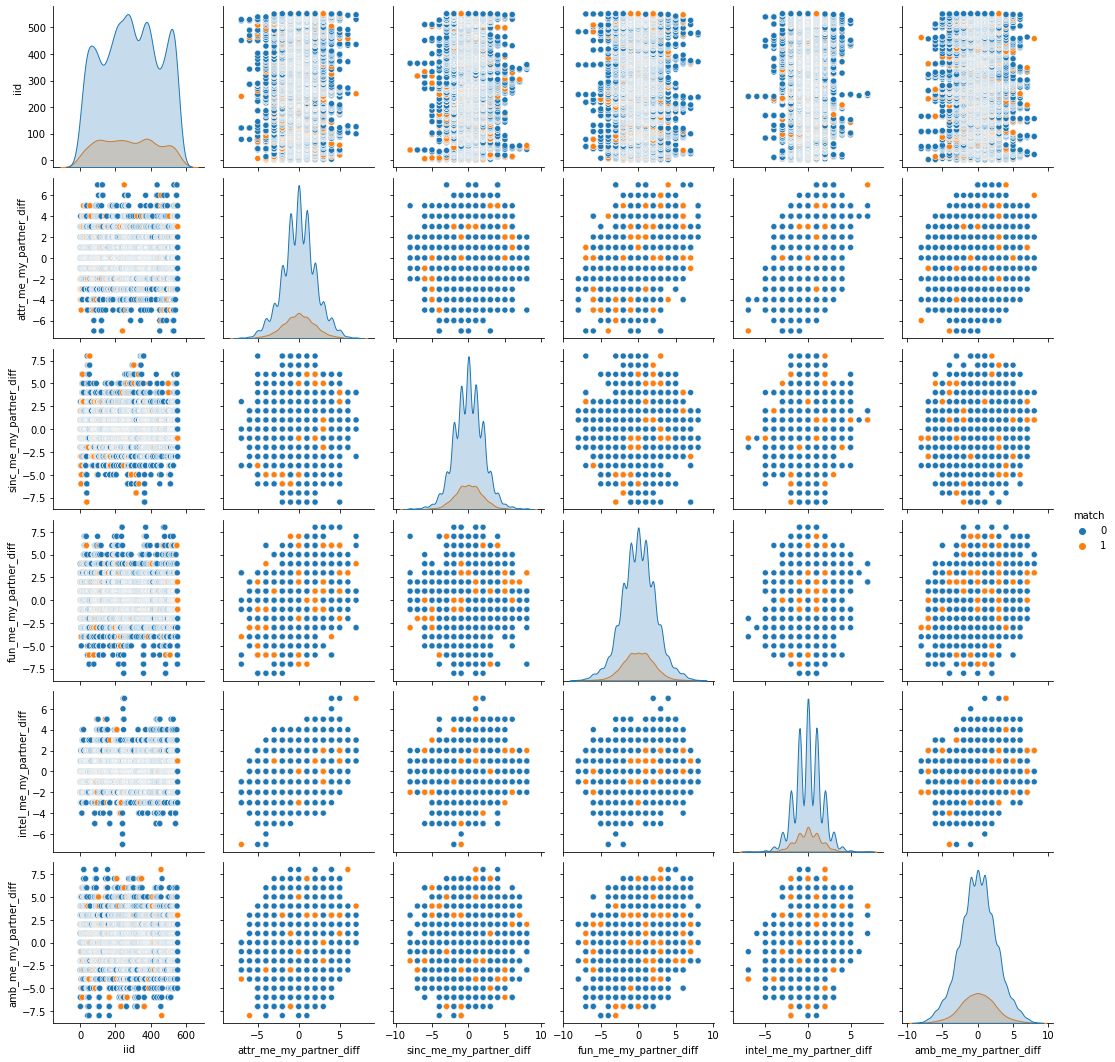

In [116]:
attributes_me_df = df[['iid',
        'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff','match'
]].drop_duplicates()

sns.pairplot(attributes_me_df,hue='match')

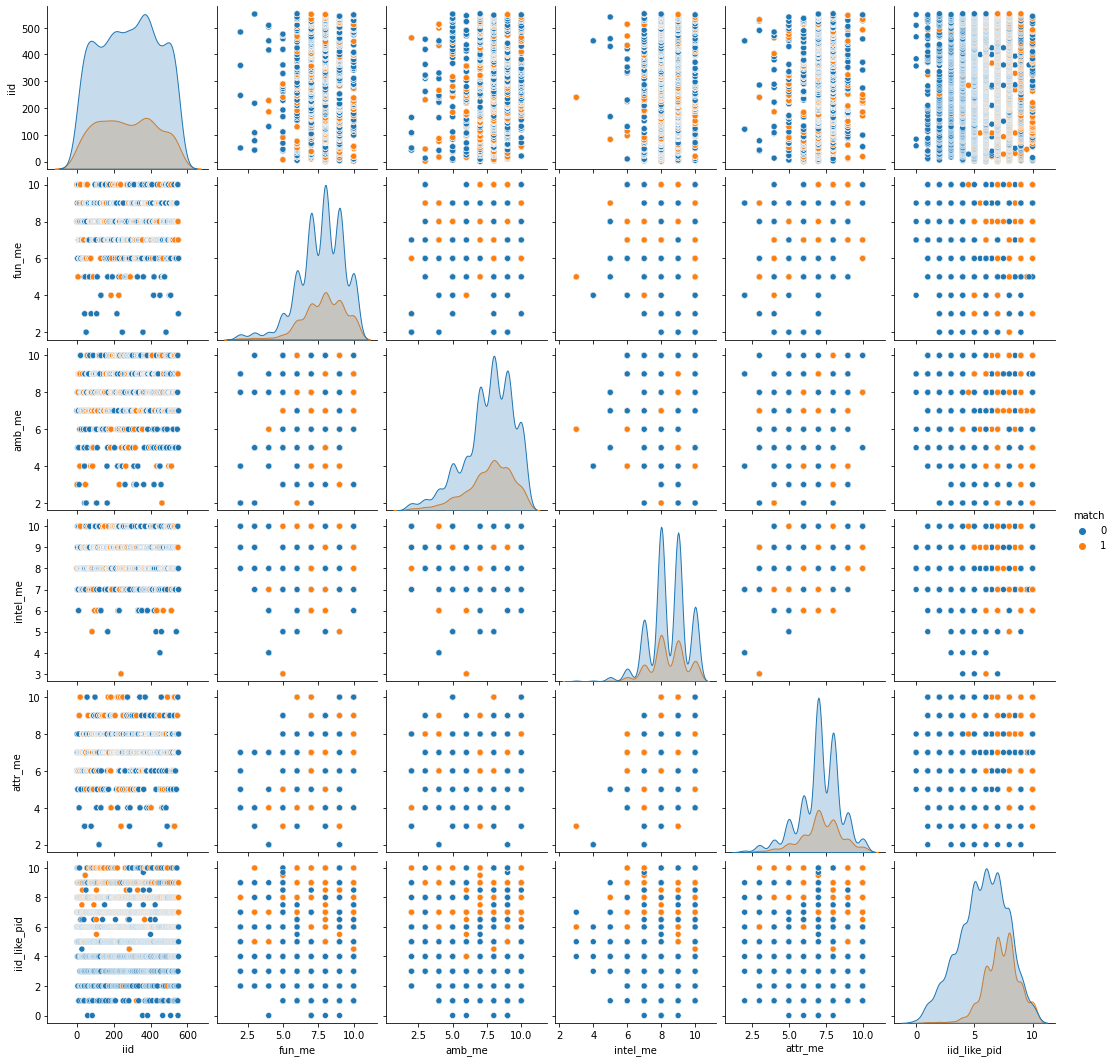

In [203]:
attributes_me_df = df[['iid',
        'fun_me','amb_me','intel_me','attr_me','iid_like_pid','match'
]].drop_duplicates()

sns.pairplot(attributes_me_df,hue='match')

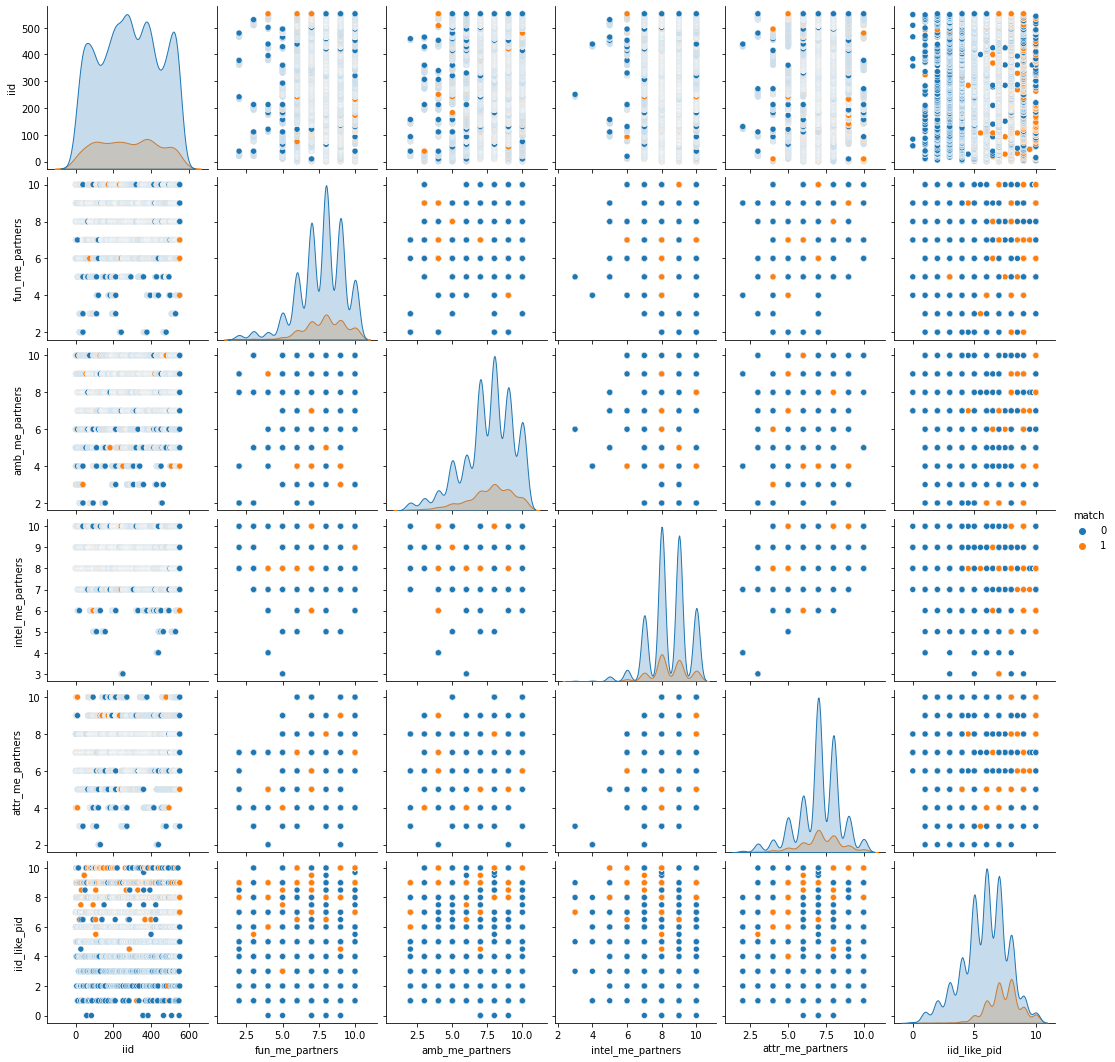

In [204]:
attributes_me_df = df[['iid',
        'fun_me_partners','amb_me_partners','intel_me_partners','attr_me_partners','iid_like_pid','match'
]].drop_duplicates()

sns.pairplot(attributes_me_df,hue='match')

##  -------------------------------------------- Poznamky --------------------------------------------

## Este mozno nejaka zakladna analyza profesii ??

### Prosim krot sa

* zakladna analyza profesii
    * kolko je ludi v jednoltivej profesii - mozno spravit nejake zgrupnutie nad zlymi nazvami (lower case, trim)
    * histogram veku
    * matche na rovnaku rasu
* veci okolo income - income difference in matches ???
    * ako casto sa chodi na rande
    * ci you_call je nejaky vyssi u profesii (engineers) ? alebo u ludi ktory chodia castejsie na rande - histogram s vlastnymi bucketmi
    * ci je them call vyssi u ludi ktory maju v priemere vysssiu atraktivitu ?
* porovnavat od kolkych cakali, ze sa im budu pacit a aka bola realita
    
    
    

##  -------------------------------------------- Povodne veci --------------------------------------------

# Uvodne navrhy na hypotezy

    * Ci inzinieri(technicky - technicky nie biomedical) najviac sadaju najviac k medikom - ak nie tak ku komu
    * Klasifikovat match medzi dvoma ludmi - na zaklade svojich preferencii a osobnosti druheho cloveka
    * Ci ludia so zalubou pre sport viac hladaju tiez sportovcov (TImova hypoteza - viac to riesia zeny)
    * Ci ludia beru aj menej inteligentnych partnerov ako su oni sami (intX in survey)



In [45]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['field'].value_counts())
info = info.reset_index()
info[info['index'].str.contains('enginee')]

index  field
30              engineering     46
41   electrical engineering     37
75   Biomedical engineering     22
142  biomedical engineering     18

In [46]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['field'].value_counts())
info = info.reset_index()
info[info['index'].str.contains('edic')]

index  field
25                                         medicine     52
32                           Biomedical Engineering     44
36                                         Medicine     40
75                           Biomedical engineering     22
79                           Biomedical Informatics     22
81                        medicine and biochemistry     21
86                              medical informatics     21
113                                     biomedicine     20
142                          biomedical engineering     18
207                            Art History/medicine     10
224  Sociomedical Sciences- School of Public Health     10
225                             Medical Informatics     10
252                          biomedical informatics      6

In [47]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['field_cd'].value_counts())
info = info.reset_index()
info

index  field_cd
0     8.0      1925
1    10.0       993
2     5.0       864
3    13.0       709
4     3.0       696
5     1.0       665
6     9.0       626
7    11.0       468
8     6.0       325
9     7.0       241
10    2.0       207
11   15.0       187
12    4.0       143
13   14.0       126
14   18.0        52
15   16.0        40
16   12.0        19
17   17.0        10

In [48]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['career'].value_counts())
info = info.reset_index()
info[info['index'].str.contains('edic')]

index  career
36                                    Medicine      40
56                                    medicine      25
136  CEO in For Profit Biomedical Organization      20
219                           Medical Sciences      15
284             medical examiner or researcher      10

In [49]:
data['num_in_3'].value_counts()

1.0    430
0.0    159
2.0     61
4.0     18
Name: num_in_3, dtype: int64

### 2 hypoteza

Features ktore hovorim JA o sebe - attr3_1

Features ktore su MOJE preferencie - attr1_1

Features ktore hovori ta baba o mne ze som taky - attr_o

Features ktore hovoria o babynych preferenciach - pf_o_atr



In [50]:
uniq_person = data.drop_duplicates(subset=['iid'])


<AxesSubplot:>

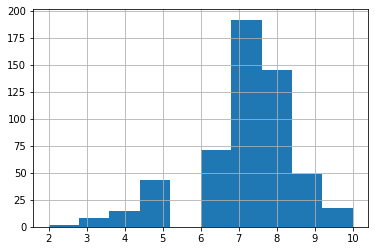

In [51]:
uniq_person['attr3_1'].hist()

<AxesSubplot:>

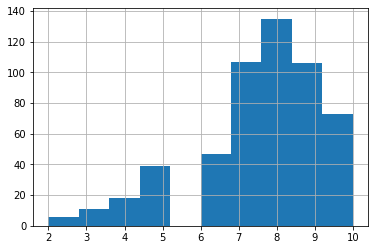

In [52]:
uniq_person['amb3_1'].hist()

In [53]:
uniq_person['sinc3_1'].hist()

<AxesSubplot:>

<AxesSubplot:>

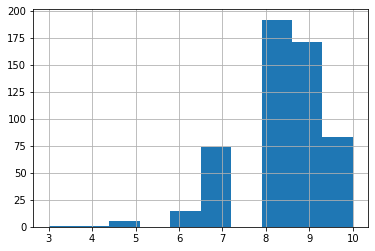

In [54]:
uniq_person['intel3_1'].hist()

In [55]:
uniq_person['fun3_1'].hist()

<AxesSubplot:>

<AxesSubplot:>

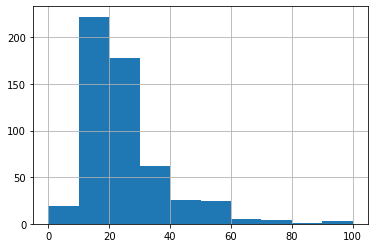

In [56]:
uniq_person['attr1_1'].hist()

<AxesSubplot:>

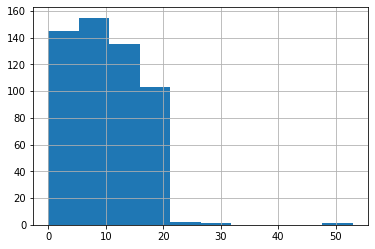

In [57]:
uniq_person['amb1_1'].hist()

<AxesSubplot:>

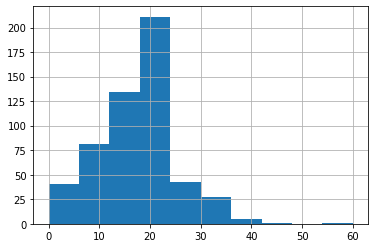

In [58]:
uniq_person['sinc1_1'].hist()

<AxesSubplot:>

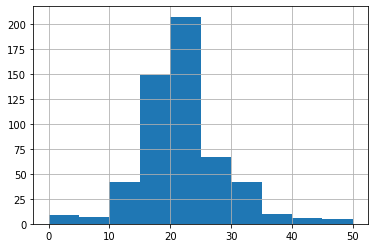

In [59]:
uniq_person['intel1_1'].hist()

<AxesSubplot:>

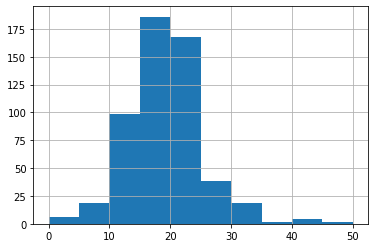

In [60]:
uniq_person['fun1_1'].hist()

##### vlastnosti 2 cloveka su vetsie ako moje ocakavania a zaroven je tam match

In [61]:
my_intel = data[['iid','intel3_1','dec','pid']]


data_persons = data.drop_duplicates(subset=['iid'])
data_intel = data_persons.merge(my_intel,how='inner',left_on='pid',right_on='iid', suffixes=['','_partner'])
data_intel = data_intel[['iid','pid','dec_partner','intel3_1_partner','dec','intel3_1']]

data_intel[(
        data_intel['intel3_1_partner'] >= data_intel['intel3_1']
    ) & ( data_intel['dec'] == 1 )]

iid    pid  dec_partner  intel3_1_partner  dec  intel3_1
0       1   11.0            0               8.0    1       8.0
1       1   11.0            0               8.0    1       8.0
2       1   11.0            0               8.0    1       8.0
3       1   11.0            0               8.0    1       8.0
4       1   11.0            0               8.0    1       8.0
...   ...    ...          ...               ...  ...       ...
8409  552  509.0            1               8.0    1       7.0
8410  552  509.0            0               8.0    1       7.0
8411  552  509.0            1               8.0    1       7.0
8412  552  509.0            0               8.0    1       7.0
8413  552  509.0            1               8.0    1       7.0

[1921 rows x 6 columns]

In [62]:
data_intel[data_intel['dec'] == 1]

iid    pid  dec_partner  intel3_1_partner  dec  intel3_1
0       1   11.0            0               8.0    1       8.0
1       1   11.0            0               8.0    1       8.0
2       1   11.0            0               8.0    1       8.0
3       1   11.0            0               8.0    1       8.0
4       1   11.0            0               8.0    1       8.0
...   ...    ...          ...               ...  ...       ...
8409  552  509.0            1               8.0    1       7.0
8410  552  509.0            0               8.0    1       7.0
8411  552  509.0            1               8.0    1       7.0
8412  552  509.0            0               8.0    1       7.0
8413  552  509.0            1               8.0    1       7.0

[3159 rows x 6 columns]

##### Iba zeny

In [63]:
my_intel = data[['iid','intel3_1','dec','pid','gender']]
my_intel = my_intel[my_intel['gender'] == 1]


data_persons = data.drop_duplicates(subset=['iid'])
data_intel = data_persons.merge(my_intel,how='inner',left_on='pid',right_on='iid', suffixes=['','_partner'])
data_intel = data_intel[['iid','pid','dec_partner','intel3_1_partner','dec','intel3_1','gender','gender_partner']]

data_intel[(
        data_intel['intel3_1_partner'] >= data_intel['intel3_1']
    ) & ( data_intel['dec'] == 1 )]

iid    pid  dec_partner  intel3_1_partner  dec  intel3_1  gender  \
0       1   11.0            0               8.0    1       8.0       0   
1       1   11.0            0               8.0    1       8.0       0   
2       1   11.0            0               8.0    1       8.0       0   
3       1   11.0            0               8.0    1       8.0       0   
4       1   11.0            0               8.0    1       8.0       0   
...   ...    ...          ...               ...  ...       ...     ...   
4210  530  531.0            0              10.0    1       9.0       0   
4211  530  531.0            0              10.0    1       9.0       0   
4212  530  531.0            0              10.0    1       9.0       0   
4213  530  531.0            0              10.0    1       9.0       0   
4214  530  531.0            0              10.0    1       9.0       0   

      gender_partner  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
4210               1  
4211               1  
4212               1  
4213               1  
4214               1  

[800 rows x 8 columns]

In [64]:
data_intel[data_intel['dec'] == 1]

iid    pid  dec_partner  intel3_1_partner  dec  intel3_1  gender  \
0       1   11.0            0               8.0    1       8.0       0   
1       1   11.0            0               8.0    1       8.0       0   
2       1   11.0            0               8.0    1       8.0       0   
3       1   11.0            0               8.0    1       8.0       0   
4       1   11.0            0               8.0    1       8.0       0   
...   ...    ...          ...               ...  ...       ...     ...   
4210  530  531.0            0              10.0    1       9.0       0   
4211  530  531.0            0              10.0    1       9.0       0   
4212  530  531.0            0              10.0    1       9.0       0   
4213  530  531.0            0              10.0    1       9.0       0   
4214  530  531.0            0              10.0    1       9.0       0   

      gender_partner  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
4210               1  
4211               1  
4212               1  
4213               1  
4214               1  

[1161 rows x 8 columns]

todo

- pozriet ostatne hypotezy
- dokoncit znenie hypotezy o inteligencii

# NA VYMAZANIE PRED ODOVZDANIM

### Unify personal data rate scale

Every participant have measured up their 6 basic attributes on scale 1-10. They also rated how important are their partner's 6 basic attributes to them. 
Speed dating has been done in 21 waves (sessions). 
In waves 6-9 the scale is 1-10,
in waves 1-5, 10-21 it is 100% devided between these attributes.

There is a need to unify these scales. 
-> Based on waves 6-9 we found out sum of points given for all 6 attributes per participant. We will use average of this value to re-scale data collected in waves 1-5 and 10-21.

In [65]:
# Number of participants in waves 6-9
waves_6_to_9 = df[(df['wave'] > 5) & (df['wave'] < 10)]
len(waves_6_to_9)

5786

In [66]:
preferred_attributes = [x for x in personal_data if x.endswith('pref')]
my_attributes = ['attr_me','sinc_me','fun_me','intel_me','amb_me']

fill_nan_with_zero(df, personal_attributes_columns)

count = 0
for index, row in df.iterrows():
    row_count = 0
    for column in preferred_attributes:
        row_count += row[column]
        count += row[column]
    if row_count < 90:
        print(row['wave'], row_count)
    
count/len(df)

NameError: name 'fill_nan_with_zero' is not defined

#### Fill NaN value in personal data with 0

In [ ]:
def fill_nan_with_zero(df, attributes):
    for attribute in attributes:
        df[attribute] = df[attribute].fillna(0)
        
personal_attributes_columns = ['attr_pref', 'sinc_pref', 'intel_pref', 'fun_pref', 'amb_pref', 'shar_pref', 'attr_me', 'sinc_me', 'intel_me', 'fun_me', 'amb_me']        
fill_nan_with_zero(personal_data, personal_attributes_columns)